## Popüler Regresyon Modelleri

## Decision Tree Reggressor (Karar Ağaçları Regresyon)

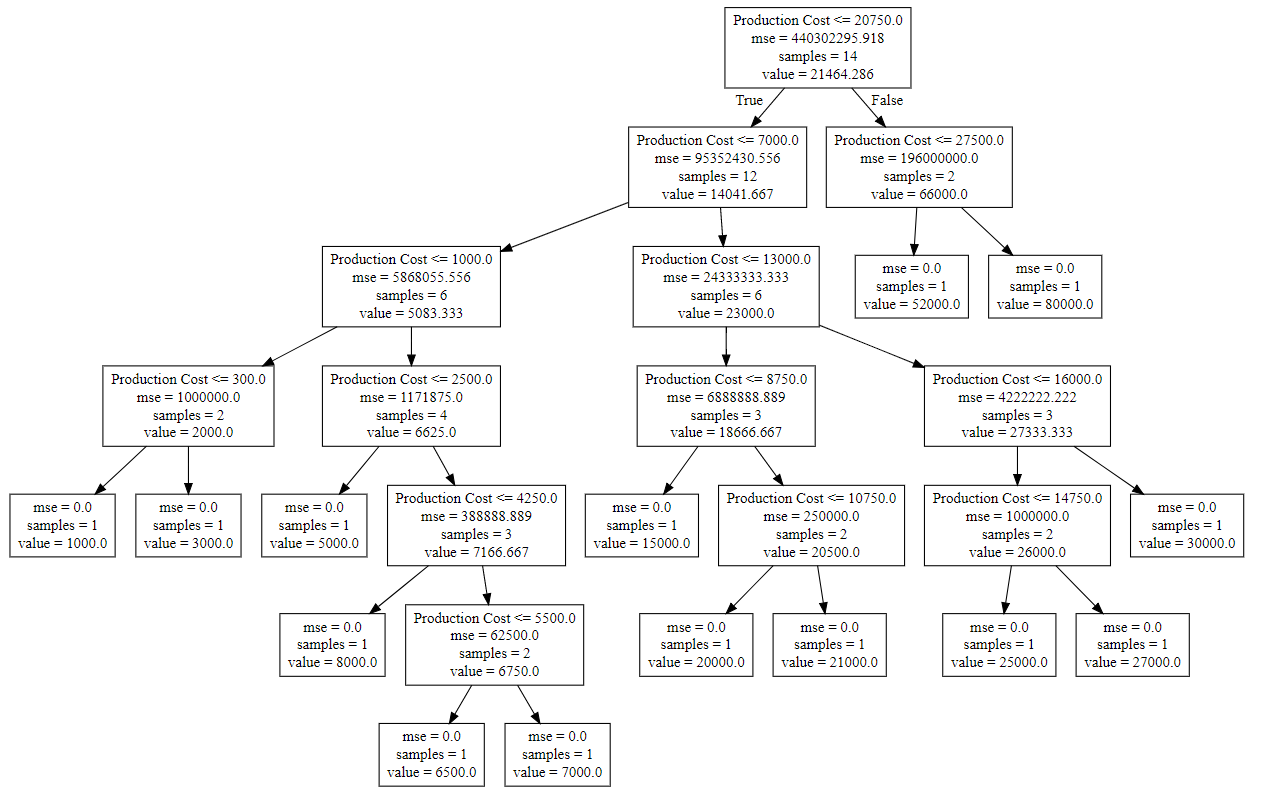

## Random Forest Regressor

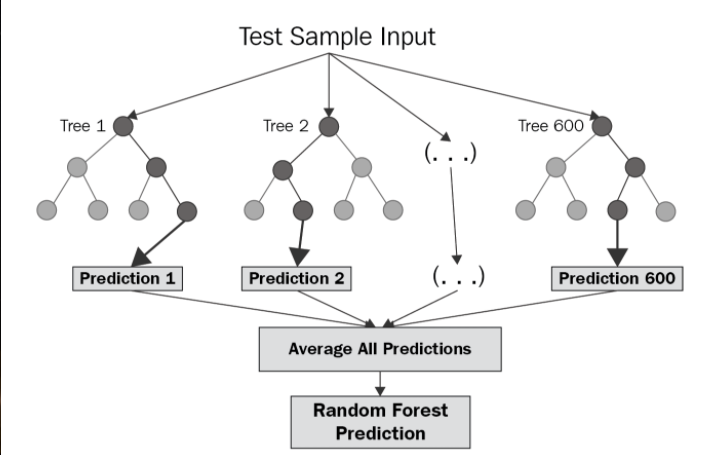

**Gradient Boosting Regressor** (GBR), makine öğreniminde kullanılan güçlü bir regresyon modelidir. Hata miktarını kademeli olarak azaltarak tahmin performansını artıran bir ensembel öğrenme tekniği kullanır. Bunu bir örnekle açıklayalım:

---

### **Problem: Kira Tahmin Modeli**
- **Hedef:** Bir dairenin konumuna, metrekaresine, oda sayısına ve diğer özelliklerine göre aylık kirasını tahmin etmek.
- **Veriler:**
  - Giriş Özellikleri (Bağımsız Değişkenler):
    - **Metrekare:** 120, 80, 100, vb.
    - **Oda Sayısı:** 2, 3, 1, vb.
    - **Konum Puanı:** 10 (en iyi) ile 1 (en kötü) arasında.
  - Hedef Değişken (Bağımlı Değişken):
    - **Kira:** 10.000 TL, 8.000 TL, 6.500 TL, vb.

---

### **Gradient Boosting Regressor'ın Çalışma Adımları**

#### 1. **Başlangıç Tahmini**
- İlk olarak, tüm kira tahminleri için **ortalama kira** alınır.
  - Örneğin, tüm dairelerin ortalama kirası 7.000 TL ise, başlangıç tahmini bu olur.
  - Her veri noktasının ilk hatası: 
    - Gerçek Kira - Ortalama Tahmin
    - Örneğin, (10.000 - 7.000) = 3.000 TL ve (6.500 - 7.000) = -500 TL gibi.

---

#### 2. **Birinci Adım: İlk Zayıf Öğrenici**
- Model, ilk hataları azaltmak için **bir karar ağacı** kullanır.
- Bu karar ağacı:
  - Verileri bölerek kira üzerindeki etkisi yüksek olan özellikleri (örneğin, metrekare veya konum puanı) dikkate alır.
  - Örneğin:
    - Eğer metrekare > 100, ekle 2.000 TL.
    - Eğer konum puanı > 8, ekle 1.000 TL.
- Bu karar ağacının tahminleri, hataların bir kısmını azaltır.

---

#### 3. **Hataların Güncellenmesi**
- Modelin tahminlerinden sonra kalan hatalar tekrar hesaplanır:
  - Örneğin, (10.000 - [7.000 + 2.000]) = 1.000 TL (güncellenmiş hata).
- Yeni hata bilgileri, bir sonraki zayıf öğreniciyi eğitmek için kullanılır.

---

#### 4. **İkinci Adım: Yeni Zayıf Öğrenici**
- Bir sonraki karar ağacı, bir önceki modelin bıraktığı hatalara odaklanır.
- Bu ağacın tahminleri de bir önceki modele eklenir:
  - Örneğin:
    - Eğer oda sayısı > 3, çıkar 500 TL.
    - Eğer konum puanı < 5, çıkar 1.500 TL.

---

#### 5. **Kademeli İyileştirme**
- Her bir adımda yeni zayıf öğreniciler eklenir ve hatalar giderek küçülür.
- Tahmin: 
  - Ortalama + İlk Ağacın Tahmini + İkinci Ağacın Tahmini + ...
  - Örneğin:
    - Ortalama Tahmin: 7.000 TL
    - İlk Ağacın Tahmini: +2.000 TL
    - İkinci Ağacın Tahmini: -500 TL
    - Nihai Tahmin: **8.500 TL**

---

### **Modelin Nihai Çıktısı**
Model, tüm zayıf öğrenicilerin sonuçlarını birleştirerek nihai tahmini yapar. Kademeli iyileştirme sayesinde model, daha yüksek doğruluk elde eder.

---

### **Somut Örnek**
**Veri Noktası:**
- Metrekare: 120
- Oda Sayısı: 3
- Konum Puanı: 9
- Gerçek Kira: 10.000 TL

**Model Tahminleri:**
1. **Başlangıç:** Ortalama kira: 7.000 TL
2. **Birinci Ağaç:** Metrekare büyükse +2.000 TL ekle → Tahmin = 9.000 TL
3. **İkinci Ağaç:** Konum puanı > 8 ise +1.000 TL ekle → Tahmin = 10.000 TL

Nihai Tahmin: **10.000 TL**

---

### **Gradient Boosting'in Avantajları**
1. **Yüksek Performans:** Karmaşık ilişkileri iyi öğrenir.
2. **Esneklik:** Hemen hemen her tür veri setine uyarlanabilir.
3. **Aykırı Değerlerle Başa Çıkma:** Daha dayanıklıdır.

---

### **Parametre Ayarları**
- **n_estimators:** Ağaç sayısı (daha fazla ağaç daha iyi öğrenme sağlar ama aşırı öğrenme riskini artırır).
- **learning_rate:** Her bir ağacın katkı oranı (küçük değerler daha genel modeller üretir).
- **max_depth:** Her ağacın derinliği (derin ağaçlar karmaşık ilişkileri öğrenir ama aşırı öğrenme riski taşır).

Bu parametreler, model performansını artırmak için dikkatle ayarlanmalıdır.

Bias ve Varyans:

Bias, modelin eğitim sırasında varsayımlarda bulunduğunda, bu varsayımların modelin test verisine uygulandığında doğru olmaması durumudur. Modelin hedef fonksiyonu öğrenmeyi kolaylaştırmak için yaptığı bu varsayımlar. Öte yandan, varyans, modelin verideki değişikliklere karşı duyarlılığıdır.

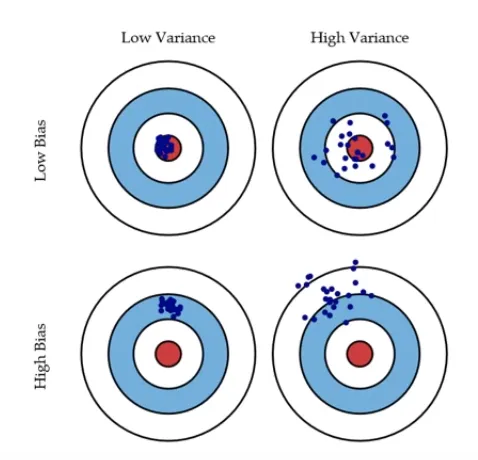

**Ridge, Lasso ve Elastic Net**, regresyon problemlerinde kullanılan **regülerizasyon** teknikleridir. Amaçları, modelin aşırı öğrenmesini (overfitting) engelleyerek daha genelleştirilebilir sonuçlar elde etmektir. Aşağıda bu yöntemler arasındaki farkları ve ne zaman kullanıldıklarını kısaca açıklıyorum:

---

### 1. **Ridge Regression (L2 Regülerizasyonu)**

#### **Nasıl Çalışır?**
- Ridge, **hataların karelerini minimize ederken** regresyon katsayılarının (model parametreleri) karelerini de cezalandırır.
- **Amaç Fonksiyonu:**
  \[
  \text{MSE} + \lambda \sum_{i=1}^{p} \beta_i^2
  \]
  - Burada \( \lambda \), regülerizasyon parametresidir. Katsayıların büyüklüğünü kontrol eder.
  - \( \beta_i^2 \) terimi, katsayıların büyüklüğünü cezalandırır.

#### **Özellikler:**
- Tüm katsayıları küçültür ama **sıfıra eşitlemez**.
- Çoklu doğrusal bağlantı (multicollinearity) durumunda performansı artırır.
- Önemli tüm özellikleri korur, ancak katsayıları küçültür.

#### **Ne Zaman Kullanılır?**
- Bağımsız değişkenler arasında yüksek korelasyon varsa.
- Özelliklerin tamamının önemli olduğunu düşündüğünüzde.

---

### 2. **Lasso Regression (L1 Regülerizasyonu)**

#### **Nasıl Çalışır?**
- Lasso, **hataların karelerini minimize ederken** regresyon katsayılarının mutlak değerlerini cezalandırır.
- **Amaç Fonksiyonu:**
  \[
  \text{MSE} + \lambda \sum_{i=1}^{p} |\beta_i|
  \]
  - Burada \( |\beta_i| \), katsayının mutlak değeridir.

#### **Özellikler:**
- Katsayıları küçültmekle kalmaz, aynı zamanda **gereksiz katsayıları sıfıra eşitler**.
- Özellik seçimi yapar (feature selection).
- Küçük etkili ve gereksiz değişkenleri otomatik olarak çıkartır.

#### **Ne Zaman Kullanılır?**
- Çok sayıda bağımsız değişken olduğunda ve bazı özelliklerin önemsiz olabileceğini düşündüğünüzde.
- Özellik seçimi yapmak istediğinizde.

---

### 3. **Elastic Net**

#### **Nasıl Çalışır?**
- Elastic Net, Ridge ve Lasso'nun birleşimidir. Hem \( L1 \) hem de \( L2 \) regülerizasyonlarını birleştirerek bir denge sağlar.
- **Amaç Fonksiyonu:**
  \[
  \text{MSE} + \lambda_1 \sum_{i=1}^{p} |\beta_i| + \lambda_2 \sum_{i=1}^{p} \beta_i^2
  \]
  - \( \lambda_1 \): Lasso’nun etkisini belirler (özellik seçimi).
  - \( \lambda_2 \): Ridge’in etkisini belirler (katsayıların küçültülmesi).

#### **Özellikler:**
- Hem özellik seçimi yapar hem de çoklu doğrusal bağlantıyı (multicollinearity) ele alır.
- İki yöntemin avantajlarını birleştirir.

#### **Ne Zaman Kullanılır?**
- Bağımsız değişkenlerin sayısının çok olduğu ve aralarında yüksek korelasyon bulunduğu durumlarda.
- Hem özellik seçimi hem de regülerizasyon yapmak istediğinizde.

---

### **Karşılaştırma Tablosu**

| Özellik                   | **Ridge**                  | **Lasso**                  | **Elastic Net**           |
|---------------------------|----------------------------|----------------------------|---------------------------|
| Regülerizasyon Türü       | L2                         | L1                         | L1 + L2                  |
| Özellik Seçimi            | Hayır                      | Evet                       | Evet                      |
| Çoklu Doğrusal Bağlantı   | İyi Performans             | Kötü Performans            | İyi Performans            |
| Katsayıları Sıfırlama     | Hayır                      | Evet                       | Evet                      |
| Kullanım Durumu           | Tüm değişkenler önemliyse  | Bazı değişkenler önemsizse | Her iki durum için uygun |

---

### **Örnek: Kira Tahmin Modeli**
- **Ridge:** Tüm özellikler kira tahmini için önemlidir (metrekare, oda sayısı, konum vb.) ve bu özellikler arasında yüksek korelasyon vardır.
- **Lasso:** Bazı özelliklerin (örneğin, asansör var/yok) kiranın üzerinde etkisi olmadığını düşünüyorsanız, bu özellikleri sıfırlayabilir.
- **Elastic Net:** Hem çoklu doğrusal bağlantıdan kaynaklı sorunları gidermek hem de gereksiz özellikleri elemek istiyorsanız.

## Kütüphaneleri yükle/içe aktar

In [13]:
from all_reg_models import all_reg_models
import pandas as pd

In [8]:
help(all_reg_models)

Help on function all_reg_models in module all_reg_models:

all_reg_models(X_train, X_test, y_train, y_test)



In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as Sclaer

## Veri setini yükle

In [17]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 5E65-6EA9

 Directory of C:\Users\Dr.Murat\Documents\ECO_Nov\ML

23.12.2024  21:58    <DIR>          .
23.12.2024  20:29    <DIR>          ..
23.12.2024  09:40    <DIR>          .ipynb_checkpoints
23.12.2024  21:29    <DIR>          __pycache__
19.02.2024  21:11             4.063 advertising.csv
19.12.2024  12:03             2.343 all_reg_models.py
19.12.2024  23:07             1.529 allreg2.py
23.12.2024  20:56           969.768 €oklu Dogrusal Regresyon.ipynb
18.12.2024  22:52             3.589 Pop Reg Mod Kullanma.ipynb
23.12.2024  21:58           444.441 Pop�ler regresyon Modelleri.ipynb
18.12.2024  21:21            18.684 regresyon i‡in metrikler.docx
               7 File(s)      1.444.417 bytes
               4 Dir(s)  722.045.448.192 bytes free


In [19]:
df=pd.read_csv('advertising.csv')

## Veri Önişleme

In [26]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [28]:
## özellikleri ve hedefi belirle
X=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [39]:
X_train, X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=.2,
                                               random_state=42)

In [42]:
all_reg_models(X_train, X_test, y_train, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 3
[LightGBM] [Info] Start training from score 14.100000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i